<a href="https://colab.research.google.com/github/maidhili-code/image.classification/blob/main/image_classification_cat_%26_dog.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning)


In [11]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/


In [12]:
!kaggle datasets download -d salader/dogs-vs-cats


Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats
License(s): unknown
dogs-vs-cats.zip: Skipping, found more recently modified local copy (use --force to force download)


In [13]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()



In [15]:
import zipfile
import os

# Unzip the file
zip_path = '/content/dogs-vs-cats.zip'  # Update path if different
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall('/content/dogs-vs-cats')

# Check contents
os.listdir('/content/dogs-vs-cats')


['dogs_vs_cats', 'train', 'test']

In [16]:
import tensorflow as tf
from tensorflow import keras
from keras.layers import Dense,Flatten,Conv2D,MaxPooling2D,BatchNormalization,Dropout
from keras import Sequential


In [17]:
train_ds=keras.utils.image_dataset_from_directory(
    directory='/content/train',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256,256)
)
validation_ds=keras.utils.image_dataset_from_directory(
    directory='/content/test',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256,256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [18]:
def process(image, label):
    image = tf.cast(image, tf.float32) / 255.0
    return image, label

train_ds = train_ds.map(process)
validation_ds=validation_ds.map(process)


In [21]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator


train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)


val_datagen = ImageDataGenerator(rescale=1./255)


train_generator = train_datagen.flow_from_directory(
    '/content/dogs-vs-cats/train',
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)


validation_generator = val_datagen.flow_from_directory(
    '/content/dogs-vs-cats/test',
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)


Found 20000 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.


In [22]:
model=Sequential()
model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding="valid"))
model.add(Conv2D(64,kernel_size=(3,3),padding="valid",activation="relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))
model.add(Conv2D(128,kernel_size=(3,3),padding="valid",activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())
model.add(Dense(128,activation="relu"))
model.add(Dropout(0.1))
model.add(Dense(64,activation="relu"))
model.add(Dropout(0.1))
model.add(Dense(1,activation="sigmoid"))

In [23]:
model.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"])

In [24]:
history=model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 65s 84ms/step - accuracy: 0.5631 - loss: 2.9215 - val_accuracy: 0.5338 - val_loss: 1.0661
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 67s 74ms/step - accuracy: 0.6979 - loss: 0.5836 - val_accuracy: 0.7440 - val_loss: 0.5400
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 82s 75ms/step - accuracy: 0.7586 - loss: 0.4930 - val_accuracy: 0.7416 - val_loss: 0.5340
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 82s 75ms/step - accuracy: 0.7914 - loss: 0.4459 - val_accuracy: 0.7146 - val_loss: 0.6249
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 86s 82ms/step - accuracy: 0.8087 - loss: 0.4234 - val_accuracy: 0.7718 - val_loss: 0.4827
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 51s 81ms/step - accuracy: 0.8522 - loss: 0.3381 - val_accuracy: 0.7872 - val_loss: 0.4541
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 47s 75ms/step - accuracy: 0.8819 - loss: 0.2724 - val_accuracy: 0.8058 - val_loss: 0.4900
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 86s 82ms/step - accuracy: 0.9152 - loss: 0.2127 - 

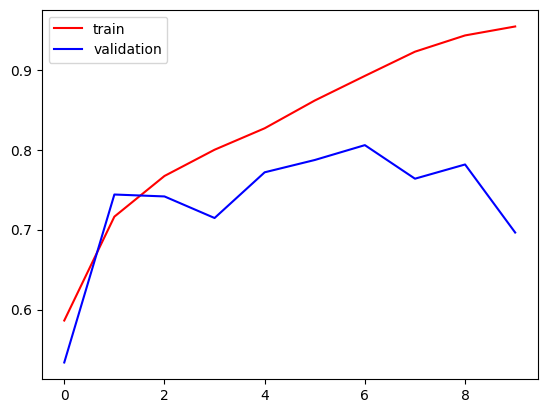

In [25]:
import matplotlib.pyplot as plt

plt.plot(history.history["accuracy"], color="red", label="train")
plt.plot(history.history["val_accuracy"], color="blue", label="validation")
plt.legend()

plt.show()


In [26]:
 import tensorflow as tf
import matplotlib.pyplot as plt

img_path = "/content/test/cats/cat.10000.jpg"  # replace with actual file name

img = tf.keras.utils.load_img(img_path, target_size=(256, 256))
img_array = tf.keras.utils.img_to_array(img) / 255.0  # normalize
img_array = tf.expand_dims(img_array, axis=0)  # reshape to (1, 256, 256, 3)


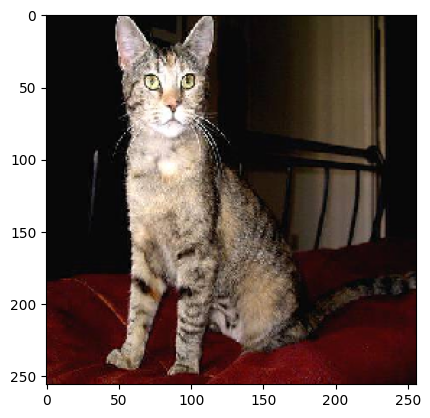

In [27]:
plt.imshow(img_array[0])

In [28]:
img_array.shape

TensorShape([1, 256, 256, 3])

In [29]:
prediction = model.predict(img_array)[0][0]
print("Raw prediction value:", prediction)

if prediction > 0.5:
    label = "Dog"
else:
    label = "Cat"

print("Predicted label:", label)



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step   
Raw prediction value: 0.004352229
Predicted label: Cat
